# 답안 작성 방법

아래 이미지에서 "더블클릭 또는 Enter키를 눌러 수정"을 누르신후 해당 창에 답을 적으시면 됩니다.

![image](https://github.com/user-attachments/assets/2aa2ff05-fb0e-4f00-a121-78afeaad4f09)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 08차시 과제

### Q1. 머신러닝에서 분류(classification) 알고리즘에는 어떠한 것들이 5개 이상 서술하라.

로지스틱 회귀, 서포트 벡터 머신, KNN, 결정 트리, 랜덤 포레스트

### Q2. 머신러닝에서 회귀(regression) 알고리즘에는 어떠한 것들이 5개 이상 서술하라.

서포트 벡터 회귀, 다항 회귀, 선형 회귀, 랜덤 포레스트 회귀

### Q3. SVM에서 마진(margin)이 무엇이고 어떠한 역할을 하는지 서술하라.

SVM에서 마진은 결정 경계와 가장 가까운 데이터 포인트 사이의 거리이고 이때 가장 가까운 데이터 포인트는 서포트 벡터이다. SVM은 이 마진을 최대화하여, 분류 경계가 두 클래스 간의 분리를 최대한 명확하게 하고, 모델의 일반화 능력을 향상시킨다. 마진이 클수록 모델이 새로운 데이터에 대해서도 잘 작동할 가능성이 높아진다.

### Q4.  이상치(Outlier)가 무엇인지 서술하라.

이상치는 데이터에서 다른 값들과 크게 다른 예외적인 값을 의미한다. 이는 주로 데이터 입력 오류, 드물게 발생하는 특이한 사건 등의 이유로 발생할 수 있으며, 데이터 분석과 모델 성능에 영향을 미칠 수 있다. 이상치는 때로는 중요한 정보를 포함하고 있을 수도 있어 신중하게 다뤄야 한다.

### Q5. Tensorflow에서 모델을 컴파일하는 함수가 무엇인지 적어라.

model.compile()

### Q6. Tensorflow에서 모델을 학습시키는 함수가 무엇인지, 그리고 그 함수의 인자로는 무엇이 필요한지 적어라.

model.fit(x, y, epochs, batch_size, validation_data, callbacks)

x - 입력 데이터

y - 출력 데이터

epochs - 반복 횟수

batch_size - 한 번의 학습 단계에서 사용할 데이터 샘플의 수

validation_data - 모델 평가를 위해 사용할 검증 데이터

callbacks - 학습 과정 중에 특정 동작을 실행하는 콜백 함수들을 지정할 수 있다

### Q7. 아래 코드는 TensorFlow를 사용하여 붓꽃(Iris) 데이터를 k-means 알고리즘으로 클러스터링하는 코드이다. 코드에 주석을 추가로 달아라.

* 단 시각화 코드에는 주석을 달지 않아도 된다.

수렴되었습니다. 반복 횟수: 4
최종 중심: 
[[-1.32765367 -0.373138   -1.13723572 -1.11486192]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [ 0.57100359 -0.37176778  0.69111943  0.66315198]]
클러스터 할당: 
[1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


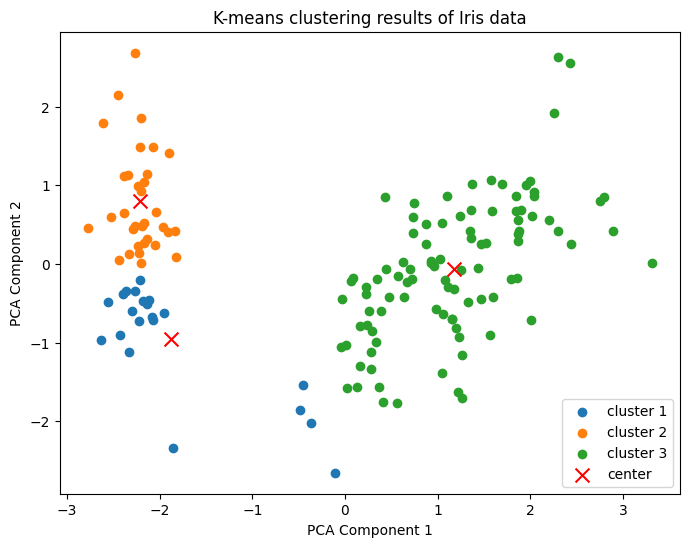

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 붓꽃 데이터 로드
iris = load_iris()
data = iris.data

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
data = scaler.fit_transform(data)  # 데이터의 각 특징을 정규화하여 평균이 0, 표준편차가 1이 되도록 변환

# k-means 매개변수 설정
k = 3  # 클러스터의 수 (붓꽃 데이터셋에 세 개의 종류가 있으므로 k=3)
max_iterations = 100  # 최대 반복 횟수
tolerance = 1e-4  # 중심점 변화 허용 오차 (수렴 조건)

# 초기 클러스터 중심을 랜덤하게 선택
centroids = tf.Variable(data[np.random.choice(data.shape[0], k, replace=False)])  # 초기 중심을 데이터 포인트 중에서 랜덤하게 선택

# k-means 알고리즘
for iteration in range(max_iterations):
    # 각 데이터 포인트와 클러스터 중심 사이의 거리 계산
    distances = tf.norm(data[:, np.newaxis] - centroids, axis=2)  # 모든 데이터 포인트와 각 클러스터 중심 간의 유클리드 거리 계산

    # 각 데이터 포인트를 가장 가까운 중심에 할당
    closest_centroids = tf.argmin(distances, axis=1)  # 가장 가까운 중심을 찾아 각 데이터 포인트에 할당

    new_centroids = []  # 새로운 중심점을 저장할 리스트
    for c in range(k):
        assigned_points = tf.gather(data, tf.where(closest_centroids == c))  # 현재 중심에 할당된 데이터 포인트들을 모음
        assigned_points = tf.squeeze(assigned_points, axis=1)  # 쓸모없는 차원을 제거하여 2D 텐서로 만듦
        new_centroids.append(tf.reduce_mean(assigned_points, axis=0))  # 할당된 포인트들의 평균을 계산하여 새로운 중심으로 설정

    new_centroids = tf.stack(new_centroids)  # 새로운 중심점을 하나의 텐서로 결합

    centroid_shift = tf.reduce_sum(tf.abs(new_centroids - centroids))  # 이전 중심과 새로운 중심 사이의 변화량 계산

    centroids.assign(new_centroids)  # 중심점을 새로운 값으로 업데이트

    if centroid_shift < tolerance:  # 중심점의 변화량이 허용 오차 이하이면 수렴했다고 간주
        print(f'수렴되었습니다. 반복 횟수: {iteration}')
        break  # 반복을 종료

# 최종 클러스터 중심 출력
print(f'최종 중심: \n{centroids.numpy()}')
# 각 데이터 포인트의 클러스터 할당 결과 출력
print(f'클러스터 할당: \n{closest_centroids.numpy()}')

# 시각화

# 2D로 시각화를 위해 PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)  # 데이터의 차원을 2D로 축소
reduced_centroids = pca.transform(centroids.numpy())  # 클러스터 중심도 같은 방식으로 차원 축소

plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = reduced_data[closest_centroids.numpy() == i]  # 각 클러스터에 속한 데이터 포인트들을 선택
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'cluster {i + 1}')  # 각 클러스터의 데이터 포인트를 플로팅

plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], color='red', marker='x', s=100, label='center')  # 중심점을 X자로 표시
plt.title('K-means clustering results of Iris data')  # 그래프 제목
plt.xlabel('PCA Component 1')  # X축 레이블
plt.ylabel('PCA Component 2')  # Y축 레이블
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력
